# CH 02

# NLP : 인간이 사용하는 언어를 컴퓨터에게 학습시키기 위한 분야

# 말뭉치 (corpus): 다량의 text data를 의미함 

# 파이썬을 통한 corpus 전처리

In [ ]:
text = "You say goodbye and I say hello."

In [ ]:
text = text.lower()
text = text.replace("."," .")
text

In [ ]:
words = text.split(" ")
words

# 단어의 ID 생성

In [ ]:
word_to_id = {}
id_to_word = {}

for word in words :
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [ ]:
id_to_word

In [ ]:
word_to_id

In [ ]:
id_to_word[1]

In [ ]:
word_to_id["hello"]

In [ ]:
import numpy as np
corpus = [word_to_id[w] for w in words ]
corpus = np.array(corpus)
corpus

In [ ]:
def preprocess(text):
    text = text.lower()
    text = text.replace("."," .")
    words = text.split(" ")
    word_to_id = {}
    id_to_word = {}
    for word in words :
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [ ]:
text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)

# 분포가설 : 단어의 의미는 단어 자체가 아닌 주변 맥락에 의해 생성

In [ ]:
import sys
sys.path.append("..")
import numpy as np
from common.util import preprocess

text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print("-------")
print("id_to_word")

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

In [3]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
], dtype=np.int32)

In [4]:
print(C[0])
print(C[4])
print(C[word_to_id["goodbye"]])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


# 동시발생 행렬 

In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.in32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] +=1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matirx[word_id, right_word_id] +=1
    return co_matrix

In [5]:
from common.util import create_co_matrix

# cos을 이용한 벡터간 유사도

In [6]:
def cos_similarity(x, y, eps = 1e-8):
    nx = x / np.sqrt(np.sum(x**2)+eps)
    ny = y / np.sqrt(np.sum(y**2)+eps)
    return np.dot(nx, ny)


In [7]:
import sys
sys.path.append("..")
from common.util import preprocess, create_co_matrix, cos_similarity
text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id["you"]]
c1 = C[word_to_id["i"]]
print(cos_similarity(c0,c1))

0.7071067691154799


In [8]:
import sys 
sys.path.append("..")
from common.util import preprocess, create_co_matrix, most_similar

text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar("you", word_to_id, id_to_word, C, top = 5)


[query] you
 hello: 0.9999999800000005
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 say: 0.0
 and: 0.0


In [9]:
import sys 
sys.path.append("..")
from common.util import preprocess, create_co_matrix, most_similar

text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar("you", word_to_id, id_to_word, C, top=5)


[query] you
 hello: 0.9999999800000005
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 say: 0.0
 and: 0.0


In [10]:
import sys 
sys.path.append("..")
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision = 3)
print("동시발생 행렬")
print(C)
print("-"* 50)
print("PPMI")
print(W)


동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [11]:
S = np.sum(C, axis=0)
print(S)

[1 4 2 2 2 2 1]


In [12]:
N = np.sum(C)
print(N)

14


# SVD를 이용한 dimension reduction 

In [9]:
import sys 
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD

U, S, V = np.linalg.svd(W)

In [10]:
print(C[0])
print("-"*50)
print(W[0])
print("-"*50)
print(U[0])

[0 1 0 0 0 0 0]
--------------------------------------------------
[0.        1.8073549 0.        0.        0.        0.        0.       ]
--------------------------------------------------
[-3.4094876e-01 -1.1102230e-16 -3.8857806e-16 -1.2051624e-01
  0.0000000e+00  9.3232495e-01  2.2259700e-16]


In [11]:
print(U[0, :2])

[-3.4094876e-01 -1.1102230e-16]


<function matplotlib.pyplot.show(*args, **kw)>

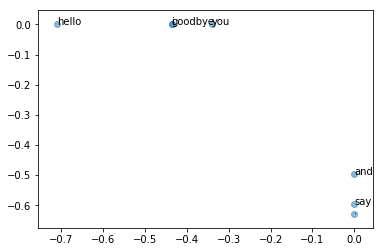

In [16]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1],alpha=0.5)
plt.show

In [17]:
import sys
sys.path.append('..')
from dataset2 import ptb

corpus, word_to_id, id_to_word = ptb.load_data("train")

print("말뭉치 크기:", len(corpus))
print("corpus[:30]:", corpus[:30])
print()
print("id_to_word[0]:", id_to_word[0])
print("id_to_word[1]:", id_to_word[1])
print("id_to_word[2]:", id_to_word[2])
print()
print("word_to_id['car']:",word_to_id["car"])
print("word_to_id['happy']:",word_to_id["happy"])
print("word_to_id['lexus']:",word_to_id["lexus"])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [18]:
import sys
sys.path.append("..")
import numpy as  np
from common.util import most_similar, create_co_matrix, ppmi
from dataset2 import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)
print("동시발생 수 계산....")
C = create_co_matrix(corpus, vocab_size, window_size)
print("PPMI 계산")
W = ppmi(C)

print("SVD 계산")
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter= 5, random_state=None)
    
except ImportError :
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ["you", "year", "car", "tyota"]

for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)





동시발생 수 계산....
PPMI 계산
SVD 계산

[query] you
 we: 0.6666585803031921
 i: 0.6508374214172363
 do: 0.5777143239974976
 'd: 0.5152052044868469
 else: 0.5011909008026123

[query] year
 month: 0.647259533405304
 quarter: 0.638397216796875
 last: 0.6184629797935486
 next: 0.6039708852767944
 earlier: 0.6014771461486816

[query] car
 auto: 0.6891331672668457
 luxury: 0.530382513999939
 domestic: 0.52860426902771
 truck: 0.4878808856010437
 vehicle: 0.4828628897666931
tyota(을)를 찾을 수 없습니다.
